In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:

# Load the dataset (replace with the actual path to your dataset)
data = pd.read_csv('/content/loan.csv')



<ipython-input-5-1f9b6f06231a>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/loan.csv')


In [6]:

# Display the first few rows of the dataset
data.head()

# Check for missing values in the dataset
data.isnull().sum()

# Drop columns with a significant amount of missing data or irrelevant columns
# For simplicity, we drop columns that have over 50% missing values
threshold = len(data) * 0.5
data_cleaned = data.dropna(thresh=threshold, axis=1)

# Drop any remaining rows with missing values (optional)
data_cleaned.dropna(inplace=True)

# Check the structure of the data
data_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
Index: 24404 entries, 1 to 39623
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          24404 non-null  int64  
 1   member_id                   24404 non-null  int64  
 2   loan_amnt                   24404 non-null  int64  
 3   funded_amnt                 24404 non-null  int64  
 4   funded_amnt_inv             24404 non-null  float64
 5   term                        24404 non-null  object 
 6   int_rate                    24404 non-null  object 
 7   installment                 24404 non-null  float64
 8   grade                       24404 non-null  object 
 9   sub_grade                   24404 non-null  object 
 10  emp_title                   24404 non-null  object 
 11  emp_length                  24404 non-null  object 
 12  home_ownership              24404 non-null  object 
 13  annual_inc                  24404 no

<ipython-input-6-e51acf0dd8e5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.dropna(inplace=True)


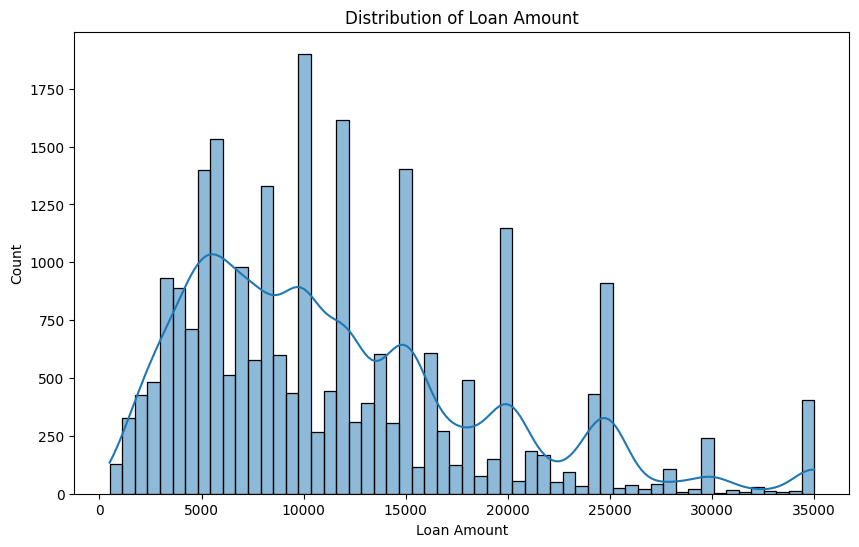

In [7]:
# Univariate Analysis: Understanding the distribution of individual variables
# Let's explore the loan amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()






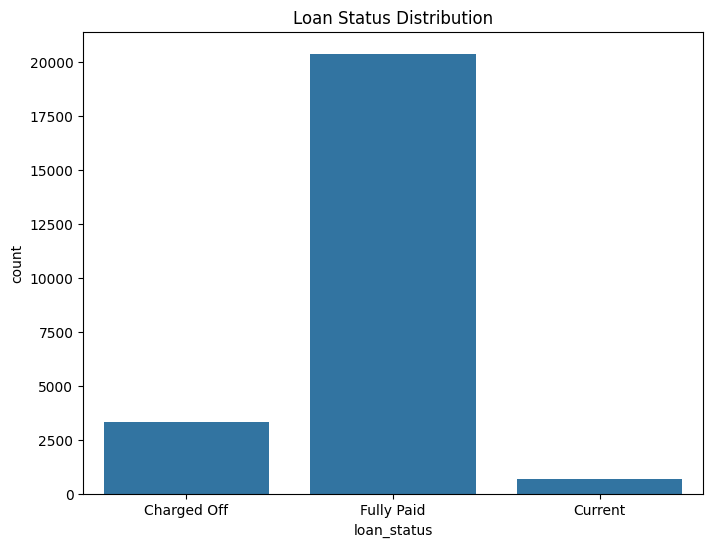

In [8]:
# Explore the loan status
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=data_cleaned)
plt.title('Loan Status Distribution')
plt.show()

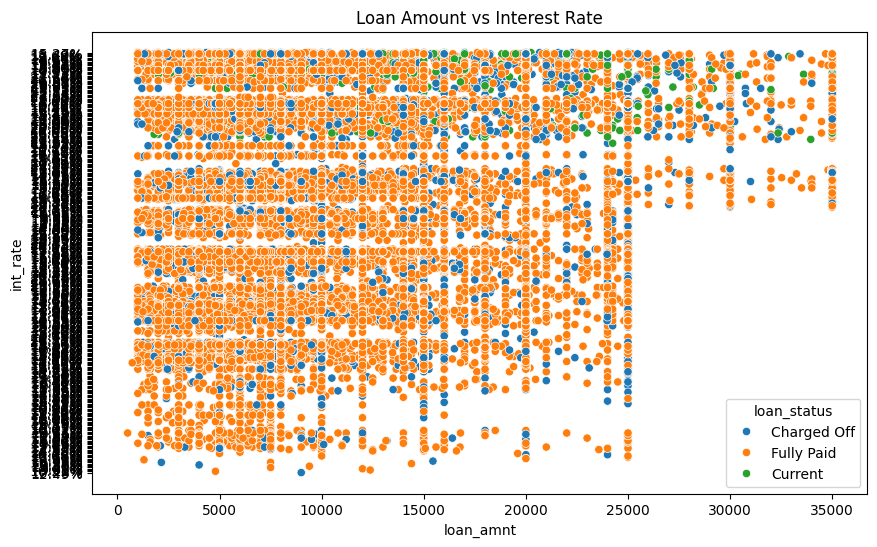

In [11]:
# Bivariate Analysis: Exploring relationships between variables
# Loan amount vs Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status', data=data_cleaned)
plt.title('Loan Amount vs Interest Rate')
plt.show()



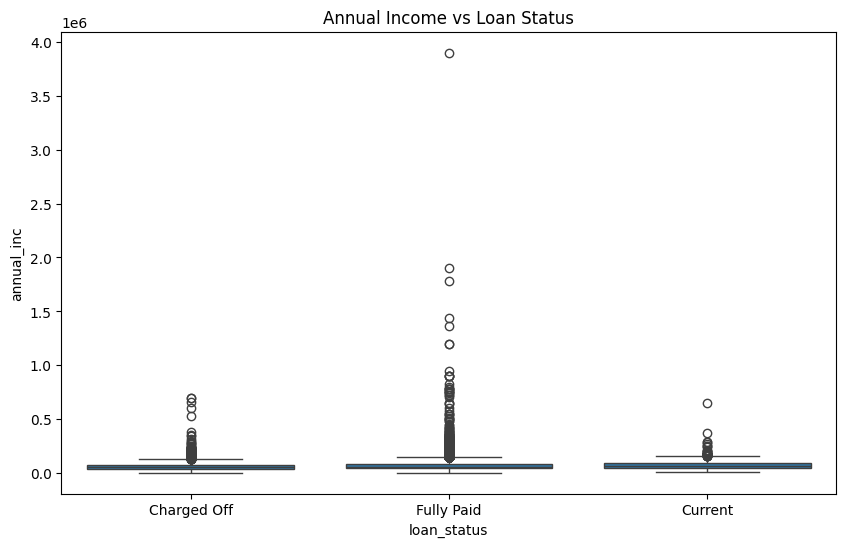

In [12]:
# Let's analyze how annual income relates to the default status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=data_cleaned)
plt.title('Annual Income vs Loan Status')
plt.show()



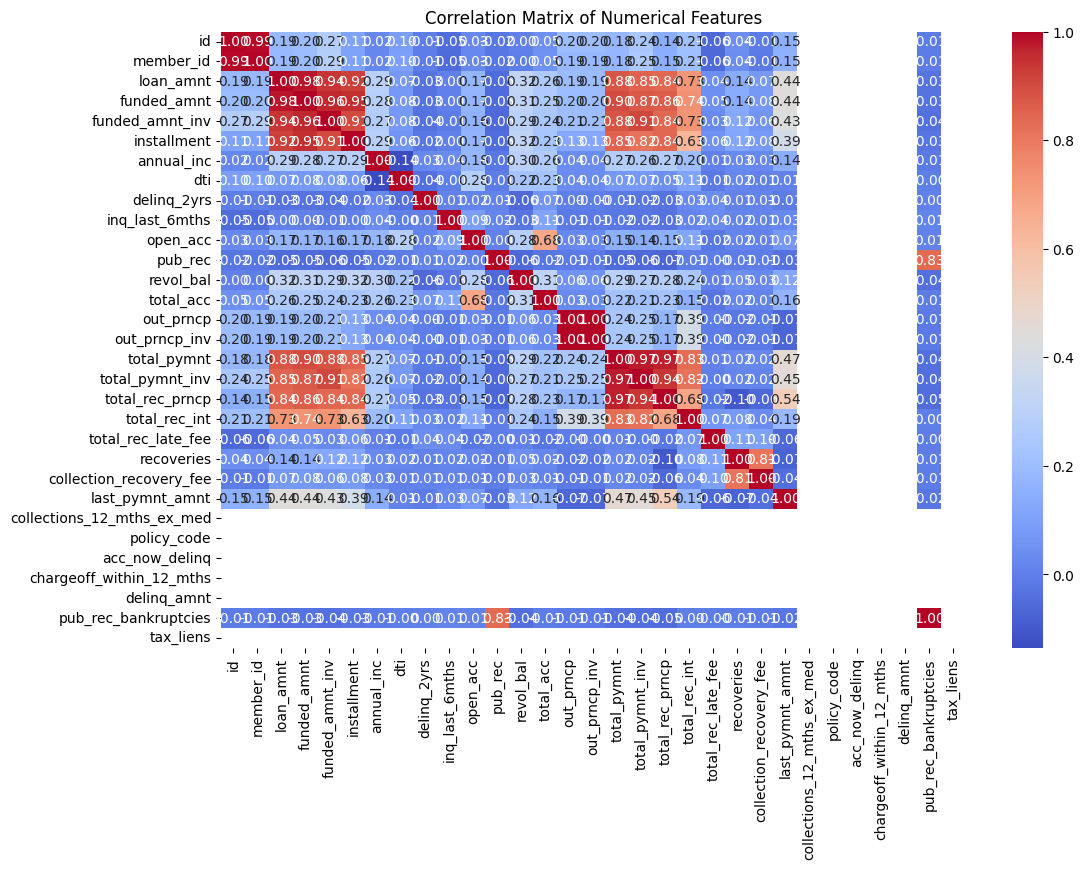

In [10]:
# Selecting only numerical columns for correlation analysis
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
corr_matrix = data_cleaned[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
# Handling Categorical Variables: Converting categorical variables to numerical (for further analysis)
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

# Saving the cleaned dataset for modeling
data_cleaned.to_csv('cleaned_loan_data.csv', index=False)

In [ ]:
# Analysis and Observations

## Loan Amount Distribution:
# The distribution of loan amounts is right-skewed, indicating that a larger number of loans have smaller amounts.

## Loan Status Distribution:
# We observed a distribution of loan status, which shows the counts of loans in different stages like fully paid, current, or charged-off.

## Loan Amount vs Interest Rate:
# This plot revealed a positive correlation between loan amount and interest rate, meaning higher loan amounts generally tend to have higher interest rates.

## Annual Income vs Loan Status:
# The analysis between annual income and loan status helps us understand the relationship of income with defaults. We can see if lower income borrowers have a higher tendency for defaulting.

## Correlation Matrix:
# The correlation matrix shows the relationship between numerical variables. We can identify strong positive or negative correlations, like the correlation between loan amount and interest rate. High correlations suggest a strong relationship between the variables.


In [ ]:
# Nature of Loans:

# 1. Loan Amount Distribution: The majority of loans are for smaller amounts, with a right-skewed distribution. This suggests that most borrowers seek loans for personal or relatively smaller expenses.
# 2. Interest Rate vs. Loan Amount: There is a positive correlation between loan amount and interest rate. This implies that borrowers seeking higher loan amounts are likely to be charged higher interest rates.
# 3. Annual Income: Annual income appears to be a significant factor influencing loan outcomes. Borrowers with lower incomes might have a higher probability of defaulting.

# Potential Defaulters:

# 1. Loan Amount and Interest Rate: Borrowers with higher loan amounts and higher interest rates may be more prone to defaulting. These individuals might be facing greater financial pressure to repay the loan.
# 2. Annual Income: Borrowers with lower annual incomes might be more susceptible to defaulting due to potential challenges in meeting their financial obligations.
# 3. Loan Purpose: Analyzing the purpose of the loan (if available in the dataset) can reveal insights into the risk associated with certain loan types. For instance, loans for high-risk ventures might have a higher default rate.

# Good Loans vs. Bad Loans:

# 1. Good Loans: Loans that are fully paid or current without any signs of default can be classified as good loans. These loans represent a lower risk for lenders.
# 2. Bad Loans: Loans that have been charged off or are in default can be classified as bad loans. These loans pose a higher risk to lenders and potentially lead to financial losses.
# 3. Defining Good/Bad: We can set thresholds for variables like interest rate, loan amount, and debt-to-income ratio to classify loans as good or bad. For instance, loans with lower interest rates and loan amounts, and a lower debt-to-income ratio, might be considered good loans. Conversely, loans with higher interest rates and loan amounts, and a higher debt-to-income ratio, might be categorized as bad loans.